## Importando bibliotecas

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np





## Configurações

In [191]:
# Define o número máximo de colunas exibidas pelo pandas
pd.set_option('display.max_columns', 200)

# Define o pandas para exibir os números em ponto flutuante com duas casas decimais
pd.set_option('display.float_format', '{:.2}'.format)

## Importando os dados

In [192]:
# Use o parâmetro lines=True
df = pd.read_json('imoveis.json', lines=True)
df.to_csv('imoveis.csv', index=False)
df.head()

,codigo_zapimoveis,data_criacao,codigo_anunciante,imobiliaria,data_coleta,valor,condominio,iptu,endereco,floorSize,numberOfRooms,numberOfBathroomsTotal,numberOfParkingSpaces,floorLevel,numberOfSuites,PETS_ALLOWED,POOL,ELEVATOR,INTERCOM,PORCELAIN,BARBECUE_GRILL,SERVICE_AREA,LAVABO,KITCHEN,GYM,GARDEN,FURNISHED,GOURMET_KITCHEN,LUNCH_ROOM,TEEN_SPACE,FOOTBALL_FIELD,NATURAL_VENTILATION,AMERICAN_KITCHEN,GATED_COMMUNITY,GUEST_PARKING,RECREATION_AREA,SQUARE,PATROL,PET_SPACE,ADULT_POOL,ELECTRONIC_GATE,PARKING,DISABLED_ACCESS,GRASS,SECURITY_CABIN,CHILDRENS_POOL,INTEGRATED_ENVIRONMENTS,AIR_CONDITIONING,SECURITY_CAMERA,TOYS_PLACE,PLAYGROUND,DINNER_ROOM,GAMES_ROOM,CONCIERGE_24H,PARTY_HALL,SAFETY_CIRCUIT,GOURMET_SPACE,SPORTS_COURT,CINEMA,BACKYARD,COPA,BALCONY,ENTRANCE_HALL,COWORKING,POOL_BAR,GOURMET_BALCONY,PANORAMIC_VIEW,DECK,INTERNET_ACCESS,WATER_TANK,GREEN_SPACE,LAUNDRY,ALARM_SYSTEM,BATHROOM_CABINETS,LARGE_KITCHEN,CLOSET,EMPLOYEE_DEPENDENCY,LARGE_ROOM,DEPOSIT,BUILTIN_WARDROBE,BEDROOM_WARDROBE,FULL_FLOOR,HOME_OFFICE,KITCHEN_CABINETS,SQUASH,TENNIS_COURT,HIGH_CEILING_HEIGHT,PANTRY,BICYCLES_PLACE,RECEPTION,ZEN_SPACE,WHIRLPOOL,MEETING_ROOM,MOUNTAIN_VIEW,SANCA,PRIVATE_POOL,SAUNA,BLINDEX_BOX,COVENTION_HALL,SERVICE_ENTRANCE,MASSAGE_ROOM,SPA,HIKING_TRAIL,SOLAR_ENERGY,SERVICE_BATHROOM,FIREPLACE,SLAB,STAIR,ECO_GARBAGE_COLLECTOR,PAVED_STREET,ELECTRIC_GENERATOR,PLANNED_FURNITURE,MASSAGE,BEAUTY_ROOM,MEZZANINE,ADMINISTRATION,STORES,BARBECUE_BALCONY,CARETAKER,ELETRIC_CHARGER,ARMORED_SECURITY_CABIN,LARGE_WINDOW,SMART_CONDOMINIUM,HEATING,ALUMINUM_WINDOW,LAKE_VIEW,FRUIT_TREES,POMAR,HEATED_POOL,TREE_CLIMBING,GOLF_FIELD,SOUNDPROOFING,COLD_FLOOR,SERVICE_ROOM,LAKE,SEA_VIEW,PIZZA_OVEN,WATCHMAN,BAR,DIGITAL_LOCKER,FENCE,SEMI_OLYMPIC_POOL,CABLE_TV,SAND_PIT,WALL_BALCONY,INDOOR_SOCCER,BEAUTY_CENTER,BATHTUB,SMART_APARTMENT,DRESS_ROOM2,REDARIO,WELL,SIDE_ENTRANCE,SMALL_ROOM,COVERAGE,CARETAKER_HOUSE,COOKER,BARN,SOLARIUM,LAMINATED_FLOOR,VEGETABLE_GARDEN,RESTAURANT,COFFEE_SHOP,CORNER_PROPERTY,REFLECTING_POOL,GEMINADA,GAS_SHOWER,FITNESS_ROOM,WALLS_GRIDS,REVERSIBLE_ROOM,DIVIDERS,RAISED_FLOOR,BACKGROUND_HOUSE,CLIMBING_WALL,DOG_KENNEL,HEADQUARTERS,HALF_FLOOR,RIVER,LIBRARY,LAND,VINYL_FLOOR,HOT_TUB,THERMAL_INSULATION,COVERED_POOL,PLATIBANDA,CHILDREN_CARE,AQUARIUM
0,2741332293,11/09/2024,AP0905,Bens Imobiliaria E Empreendimentos Ltda - Me,10/07/2025,R$ 930.000,R$ 1.100,R$ 1.500,"Rua Félix Carolino Barbosa - Lauritzen , Campi...",250 m²,3 quartos,5 banheiros,,,,,,,,,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2793509600,02/04/2025,720881008-102,Re/Max Viva Imóveis,10/07/2025,R$ 550.000,R$ 280,R$ 738,"Avenida Marechal Floriano Peixoto - Serrotão ,...",184 m²,3 quartos,3 banheiros,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2814296716,15/06/2025,A

## Análise inicial

In [193]:
df.shape

(1658, 187)

In [194]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 187 columns):
 #    Column                   Dtype 
---   ------                   ----- 
 0    codigo_zapimoveis        int64 
 1    data_criacao             object
 2    codigo_anunciante        object
 3    imobiliaria              object
 4    data_coleta              object
 5    valor                    object
 6    condominio               object
 7    iptu                     object
 8    endereco                 object
 9    floorSize                object
 10   numberOfRooms            object
 11   numberOfBathroomsTotal   object
 12   numberOfParkingSpaces    object
 13   floorLevel               object
 14   numberOfSuites           object
 15   PETS_ALLOWED             object
 16   POOL                     object
 17   ELEVATOR                 object
 18   INTERCOM                 object
 19   PORCELAIN                object
 20   BARBECUE_GRILL           object
 21   SERVICE_AREA

Após usar o método info() podemos ver que as colunas com valores numéricos não estão no tipo certo e com uma olhada rapida vemos que existem muitas colunas que foram coletadas e não tem nenhum dado relevante

In [195]:
print(f'{df.isna().sum().sum()} valores faltantes')
print(f'{df.duplicated().sum()} valores duplicados')

269497 valores faltantes
0 valores duplicados


Devido a grande quantidade de dados faltando, primeiramente iremos ver quais as colunas que devem ser removidas para facilitar nosso tratamento.

In [196]:
for coluna in df.columns:
    qtd_faltantes = df[coluna].isna().sum()
    print(f'Coluna "{coluna}": {qtd_faltantes} valores faltantes')

Coluna "codigo_zapimoveis": 0 valores faltantes
Coluna "data_criacao": 0 valores faltantes
Coluna "codigo_anunciante": 0 valores faltantes
Coluna "imobiliaria": 0 valores faltantes
Coluna "data_coleta": 0 valores faltantes
Coluna "valor": 0 valores faltantes
Coluna "condominio": 0 valores faltantes
Coluna "iptu": 0 valores faltantes
Coluna "endereco": 0 valores faltantes
Coluna "floorSize": 0 valores faltantes
Coluna "numberOfRooms": 0 valores faltantes
Coluna "numberOfBathroomsTotal": 0 valores faltantes
Coluna "numberOfParkingSpaces": 159 valores faltantes
Coluna "floorLevel": 1303 valores faltantes
Coluna "numberOfSuites": 388 valores faltantes
Coluna "PETS_ALLOWED": 866 valores faltantes
Coluna "POOL": 844 valores faltantes
Coluna "ELEVATOR": 1146 valores faltantes
Coluna "INTERCOM": 1457 valores faltantes
Coluna "PORCELAIN": 1449 valores faltantes
Coluna "BARBECUE_GRILL": 895 valores faltantes
Coluna "SERVICE_AREA": 1115 valores faltantes
Coluna "LAVABO": 1571 valores faltantes
Co

Iteramos por todas as colunas pra saber a quantidade de dados faltantes de cada coluna.

Para saber qual coluna remover usaremos a seguinte lógica.
Se a coluna tiver um valor > que 30% das linhas com valores ausentes, esta coluna deve ser removida.
Temos aproximadamente 1700 linhas, podemos arredondar para 550 linhas em branco

In [197]:
total_linhas = len(df)
limite_remocao = 550
colunas_para_remover = []

for coluna in df.columns:
    qtd_faltantes = df[coluna].isna().sum()
    if qtd_faltantes >= limite_remocao:
        colunas_para_remover.append(coluna)

# Remove as colunas selecionadas
df = df.drop(columns=colunas_para_remover)
print(f"\nColunas removidas: {colunas_para_remover}")


Colunas removidas: ['floorLevel', 'PETS_ALLOWED', 'POOL', 'ELEVATOR', 'INTERCOM', 'PORCELAIN', 'BARBECUE_GRILL', 'SERVICE_AREA', 'LAVABO', 'KITCHEN', 'GYM', 'GARDEN', 'FURNISHED', 'GOURMET_KITCHEN', 'LUNCH_ROOM', 'TEEN_SPACE', 'FOOTBALL_FIELD', 'NATURAL_VENTILATION', 'AMERICAN_KITCHEN', 'GATED_COMMUNITY', 'GUEST_PARKING', 'RECREATION_AREA', 'SQUARE', 'PATROL', 'PET_SPACE', 'ADULT_POOL', 'ELECTRONIC_GATE', 'PARKING', 'DISABLED_ACCESS', 'GRASS', 'SECURITY_CABIN', 'CHILDRENS_POOL', 'INTEGRATED_ENVIRONMENTS', 'AIR_CONDITIONING', 'SECURITY_CAMERA', 'TOYS_PLACE', 'PLAYGROUND', 'DINNER_ROOM', 'GAMES_ROOM', 'CONCIERGE_24H', 'PARTY_HALL', 'SAFETY_CIRCUIT', 'GOURMET_SPACE', 'SPORTS_COURT', 'CINEMA', 'BACKYARD', 'COPA', 'BALCONY', 'ENTRANCE_HALL', 'COWORKING', 'POOL_BAR', 'GOURMET_BALCONY', 'PANORAMIC_VIEW', 'DECK', 'INTERNET_ACCESS', 'WATER_TANK', 'GREEN_SPACE', 'LAUNDRY', 'ALARM_SYSTEM', 'BATHROOM_CABINETS', 'LARGE_KITCHEN', 'CLOSET', 'EMPLOYEE_DEPENDENCY', 'LARGE_ROOM', 'DEPOSIT', 'BUILTIN_WA

após remover as colunas, vamos olhar como está o dataframe atualmente

In [198]:
df.tail()

,codigo_zapimoveis,data_criacao,codigo_anunciante,imobiliaria,data_coleta,valor,condominio,iptu,endereco,floorSize,numberOfRooms,numberOfBathroomsTotal,numberOfParkingSpaces,numberOfSuites
1653,2736338937,20/08/2024,247900,Selena Maria Mello Galdino,10/07/2025,R$ 289.900,não informado,não informado,"Catole, Campina Grande - PB",52 m²,2 quartos,1 banheiro,,
1654,2573832979,30/07/2022,Wva,Facilita Imóveis,10/07/2025,R$ 220.000,isento,não informado,"Rua Rita Alves Ramos, 470 - Itararé, Campina G...",60 m²,2 quartos,2 banheiros,,
1655,2688516920,05/02/2024,97de69,Fabiane C. Estrela,10/07/2025,R$ 163.000,não informado,não informado,Rua Doutor Raimundo Maia de Oliveira - Três Ir...,50 m²,2 quartos,1 banheiro,,NaN
1656,2811321180,04/06/2025,AP0710,Bens Imobiliaria E Empreendimentos Ltda - Me,10/07/2025,R$ 539.900,R$ 515,não informado,"Rua Álvaro de Araújo Pereira, 205 - Alto Branc...",87 m²,3 quartos,2 banheiros,,
1657,2766716920,26/12/2024,720881008-94,Re/Max Viva Imóveis,10/07/2025,R$ 155.000,R$ 350,não informado,"Rua da Independência - Sao Jose, Campina Grand...",46 m²,2 quartos,1 banheiro,,NaN


Apesar da remoção algumas colunas ainda continuaram aparentemente com muitos valores faltantes, será necessário uma analise mais aprofundada nas colunas especificas

In [199]:
for valor in df['numberOfSuites'].unique():
    print(f"'{valor}'")

''
'nan'


In [200]:
for valor in df['numberOfParkingSpaces'].unique():
    print(f"'{valor}'")

''
'nan'


Como podemos ver, as colunas não foram removidas mas por alguma formatação de string não são consideradas valores ausentes, iremos remove-las juntamente com as colunas que não agregam valor para nossa análise como códigos e datas.

In [201]:
colunas_para_remover = ['codigo_zapimoveis', 'data_criacao', 'codigo_anunciante', 'imobiliaria', 'data_coleta', 'numberOfParkingSpaces', 'numberOfSuites']

df.drop(columns=colunas_para_remover, inplace=True)

In [202]:
df.head()

,valor,condominio,iptu,endereco,floorSize,numberOfRooms,numberOfBathroomsTotal
0,R$ 930.000,R$ 1.100,R$ 1.500,"Rua Félix Carolino Barbosa - Lauritzen , Campi...",250 m²,3 quartos,5 banheiros
1,R$ 550.000,R$ 280,R$ 738,"Avenida Marechal Floriano Peixoto - Serrotão ,...",184 m²,3 quartos,3 banheiros
2,R$ 199.990,R$ 120,não informado,"Jardim Paulistano, Campina Grande - PB",64 m²,3 quartos,2 banheiros
3,R$ 295.000,R$ 126,não informado,"Avenida Francisco Lopes de Almeida, 986 - Serr...",66 m²,3 quartos,2 banheiros
4,R$ 238.000,R$ 220,não informado,"Rua Francisco Ernesto do Rego, 1591 - Cruzeiro...",70 m²,3 quartos,2 banheiros


Agora que temos apenas os dados importantes começaremos a tratar os tipos de dados de cada coluna

In [203]:
colunas_tratadas = ['valor', 'condominio', 'iptu', 'floorSize', 'numberOfRooms', 'numberOfBathroomsTotal']

for i in colunas_tratadas:
    if i not in ['floorSize', 'numberOfRooms', 'numberOfBathroomsTotal']:
        df[i] = df[i].str.replace('R$', '', regex=False)
        df[i] = df[i].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)  # Trata decimais
        df[i] = df[i].str.strip()
        df[i] = pd.to_numeric(df[i], errors='coerce').fillna(0).astype(int)  # Converte com segurança
    
    elif i == 'floorSize':
        df[i] = df[i].str.replace('m²', '', regex=False).str.strip()
        df[i] = pd.to_numeric(df[i], errors='coerce').fillna(0).astype(int)
    
    elif i == 'numberOfRooms':
        df[i] = df[i].str.replace('quartos', '', regex=False).str.strip()
        df[i] = pd.to_numeric(df[i], errors='coerce').fillna(0).astype(int)
    
    elif i == 'numberOfBathroomsTotal':
        df[i] = df[i].str.replace('banheiros', '', regex=False).str.strip()
        df[i] = pd.to_numeric(df[i], errors='coerce').fillna(0).astype(int)

In [204]:
df.head()

,valor,condominio,iptu,endereco,floorSize,numberOfRooms,numberOfBathroomsTotal
0,930000,1100,1500,"Rua Félix Carolino Barbosa - Lauritzen , Campi...",250,3,5
1,550000,280,738,"Avenida Marechal Floriano Peixoto - Serrotão ,...",184,3,3
2,199990,120,0,"Jardim Paulistano, Campina Grande - PB",64,3,2
3,295000,126,0,"Avenida Francisco Lopes de Almeida, 986 - Serr...",66,3,2
4,238000,220,0,"Rua Francisco Ernesto do Rego, 1591 - Cruzeiro...",70,3,2


In [205]:
nomes_colunas = {'numberOfRooms': 'num_quartos', 'numberOfBathroomsTotal':'num_banheiros', 'floorSize':'area'}

df = df.rename(columns=nomes_colunas)

In [206]:
qtd_zeros = (df['iptu'] == 0).sum()
print(f"Número de linhas com 0: {qtd_zeros}")

Número de linhas com 0: 1279


In [207]:
qtd_zeros = (df['condominio'] == 0).sum()
print(f"Número de linhas com 0: {qtd_zeros}")

Número de linhas com 0: 979


Agora iremos tratar o endereço.  
Sabendo que o que mais importa para esta análise é o bairro

In [208]:
df.endereco

0       Rua Félix Carolino Barbosa - Lauritzen , Campi...
1       Avenida Marechal Floriano Peixoto - Serrotão ,...
2                  Jardim Paulistano, Campina Grande - PB
3       Avenida Francisco Lopes de Almeida, 986 - Serr...
4       Rua Francisco Ernesto do Rego, 1591 - Cruzeiro...
                              ...                        
1653                          Catole, Campina Grande - PB
1654    Rua Rita Alves Ramos, 470 - Itararé, Campina G...
1655    Rua Doutor Raimundo Maia de Oliveira - Três Ir...
1656    Rua Álvaro de Araújo Pereira, 205 - Alto Branc...
1657    Rua da Independência - Sao Jose, Campina Grand...
Name: endereco, Length: 1658, dtype: object

Pelo que podemos perceber o padrão do endereço é "Nome da Rua - Bairro"

In [209]:
# Dividir a coluna 'endereço' em três partes usando o separador " - "
df[['logradouro', 'bairro', 'cidade']] = df['endereco'].str.split(' - ', expand=True, n=2)

# Remover espaços extras (strip) em cada nova coluna
df['logradouro'] = df['logradouro'].str.strip()
df['bairro'] = df['bairro'].str.strip()
df['cidade'] = df['cidade'].str.strip()

# removendo a coluna endereço
df = df.drop('endereco', axis=1)

In [210]:
df.head()

,valor,condominio,iptu,area,num_quartos,num_banheiros,logradouro,bairro,cidade
0,930000,1100,1500,250,3,5,Rua Félix Carolino Barbosa,"Lauritzen , Campina Grande",PB
1,550000,280,738,184,3,3,Avenida Marechal Floriano Peixoto,"Serrotão , Campina Grande",PB
2,199990,120,0,64,3,2,"Jardim Paulistano, Campina Grande",PB,None
3,295000,126,0,66,3,2,"Avenida Francisco Lopes de Almeida, 986","Serrotão , Campina Grande",PB
4,238000,220,0,70,3,2,"Rua Francisco Ernesto do Rego, 1591","Cruzeiro, Campina Grande",PB


In [211]:
df.bairro.unique()

array(['Lauritzen , Campina Grande', 'Serrotão , Campina Grande', 'PB',
       'Cruzeiro, Campina Grande', 'Sandra Cavalcante , Campina Grande',
       'Bodocongo, Campina Grande', 'Jardim Tavares, Campina Grande',
       'Malvinas, Campina Grande', 'Três Irmãs , Campina Grande',
       'Prata, Campina Grande', 'Mirante, Campina Grande',
       'Jardim Paulistano, Campina Grande', 'Centro, Campina Grande',
       'Cuités, Campina Grande', 'Alto Branco, Campina Grande',
       'Catole, Campina Grande', 'Santo Antônio, Campina Grande',
       'Mutirão do Serrotão', 'Itararé, Campina Grande',
       'Bela Vista, Campina Grande', 'Jose Pinheiro, Campina Grande',
       'Vila Cabral , Campina Grande',
       'Rocha Cavalcante , Campina Grande',
       'Portal Sudoeste, Campina Grande', 'Conceicao, Campina Grande',
       'Santa Cruz , Campina Grande', 'Dinamerica, Campina Grande',
       'Palmeira, Campina Grande', 'Nacoes, Campina Grande',
       'Universitário, Campina Grande',
       'Ac

In [212]:
df['bairro'] = df['bairro'].str.replace(', Campina Grande', '', regex=False)

In [213]:
df.bairro.unique()

array(['Lauritzen ', 'Serrotão ', 'PB', 'Cruzeiro', 'Sandra Cavalcante ',
       'Bodocongo', 'Jardim Tavares', 'Malvinas', 'Três Irmãs ', 'Prata',
       'Mirante', 'Jardim Paulistano', 'Centro', 'Cuités', 'Alto Branco',
       'Catole', 'Santo Antônio', 'Mutirão do Serrotão', 'Itararé',
       'Bela Vista', 'Jose Pinheiro', 'Vila Cabral ', 'Rocha Cavalcante ',
       'Portal Sudoeste', 'Conceicao', 'Santa Cruz ', 'Dinamerica',
       'Palmeira', 'Nacoes', 'Universitário', 'Acácio Figueiredo',
       'Jardim Quarenta ', 'Velame', 'Santa Rosa', 'Cidades',
       'Presidente Médici ', 'Distrito Industrial', 'Liberdade',
       'Nova Brasília ', 'Castelo Branco ', 'Monte Santo ',
       'Monte Castelo ', 'Distrito dos Mecânicos ', 'Sao Jose',
       'Três Irmãs', 'Estação Velha ', 'Tambor', 'Serrotão', 'Centenario',
       'Bento Figueiredo', 'Aluizio Campos', 'Jeremias', 'Ramadinha',
       'Araxá', 'Conjunto Cinza ', 'Louzeiro', 'Palmeira Imperial',
       'Jardim Itarare'], dtype=obje

Após ver estas ocorrencias, pude perceber que existe um bairro 'PB' o que obviamente é um erro, irei analisar mais a fundo.

In [214]:
df[df['bairro'] == 'PB']

,valor,condominio,iptu,area,num_quartos,num_banheiros,logradouro,bairro,cidade
2,199990,120,0,64,3,2,"Jardim Paulistano, Campina Grande",PB,None
15,360000,700,510,93,3,2,"Catole, Campina Grande",PB,None
19,3000000,0,0,400,5,5,"Jardim Tavares, Campina Grande",PB,None
23,1300000,0,0,250,4,0,"Liberdade, Campina Grande",PB,None
24,2600000,0,0,352,4,3,"Mirante, Campina Grande",PB,None
...,...,...,...,...,...,...,...,...,...
1639,1950000,0,0,300,5,5,"Itararé, Campina Grande",PB,None
1644,681000,0,0,139,3,3,"Santa Terezinha , Campina Grande",PB,None
1649,500000,0,0,280,5,5,"Jose Pinheiro, Campina Grande",PB,None
1652,1100000,745,0,150,3,4,"Mirante, Campina Grande",PB,None


In [215]:
df.loc[df['bairro'] == 'PB', 'bairro'] = df.loc[df['bairro'] == 'PB', 'logradouro']

Aqui podemos ver que provavelmente o endereço não foi digitado no padrão correto, portanto o bairro ficou na coluna logradouro. Iremos tratar isso

In [216]:
df.head()

,valor,condominio,iptu,area,num_quartos,num_banheiros,logradouro,bairro,cidade
0,930000,1100,1500,250,3,5,Rua Félix Carolino Barbosa,Lauritzen,PB
1,550000,280,738,184,3,3,Avenida Marechal Floriano Peixoto,Serrotão,PB
2,199990,120,0,64,3,2,"Jardim Paulistano, Campina Grande","Jardim Paulistano, Campina Grande",None
3,295000,126,0,66,3,2,"Avenida Francisco Lopes de Almeida, 986",Serrotão,PB
4,238000,220,0,70,3,2,"Rua Francisco Ernesto do Rego, 1591",Cruzeiro,PB


In [217]:
df['bairro'] = df['bairro'].str.replace(', Campina Grande', '', regex=False)

In [218]:
df.bairro.unique()

array(['Lauritzen ', 'Serrotão ', 'Jardim Paulistano', 'Cruzeiro',
       'Sandra Cavalcante ', 'Bodocongo', 'Jardim Tavares', 'Malvinas',
       'Três Irmãs ', 'Prata', 'Mirante', 'Centro', 'Catole', 'Cuités',
       'Alto Branco', 'Liberdade', 'Santo Antônio', 'Santa Terezinha ',
       'Mutirão do Serrotão', 'Itararé', 'Bela Vista', 'Estação Velha ',
       'Jose Pinheiro', 'Vila Cabral ', 'Nacoes', 'Rocha Cavalcante ',
       'Portal Sudoeste', 'Conceicao', 'Santa Cruz ', 'Zona Rural',
       'Dinamerica', 'Palmeira', 'Universitário', 'Acácio Figueiredo',
       'Galante', 'Jardim Quarenta ', 'Velame', 'Santa Rosa', 'Cidades',
       'Presidente Médici ', 'Nova Brasília ', 'Distrito Industrial',
       'Campina Grande', 'Castelo Branco ', 'Monte Santo ',
       'Monte Castelo ', 'Distrito dos Mecânicos ', 'Sao Jose',
       'Centenario', 'Três Irmãs', 'Ramadinha', 'Tambor', 'Serrotão',
       'Bento Figueiredo', 'Aluizio Campos', 'Jeremias', 'Araxá',
       'Conjunto Cinza ', 'Louz

In [219]:
df.drop(columns=['logradouro', 'cidade'], inplace=True)

In [220]:
df.head()

,valor,condominio,iptu,area,num_quartos,num_banheiros,bairro
0,930000,1100,1500,250,3,5,Lauritzen
1,550000,280,738,184,3,3,Serrotão
2,199990,120,0,64,3,2,Jardim Paulistano
3,295000,126,0,66,3,2,Serrotão
4,238000,220,0,70,3,2,Cruzeiro


In [221]:
df.describe()

,valor,condominio,iptu,area,num_quartos,num_banheiros
count,1.7e+03,1.7e+03,1.7e+03,1.7e+03,1.7e+03,1.7e+03
mean,1.1e+06,5.9e+02,1.4e+02,1.4e+02,2.8,2.2
std,1.2e+07,1.3e+04,4.2e+02,1.6e+02,1.1,1.8
min,1.8e+04,0.0,0.0,1e+01,0.0,0.0
25%,2.2e+05,0.0,0.0,6.3e+01,2.0,0.0
50%,4.2e+05,0.0,0.0,9.6e+01,3.0,2.0
75%,6.8e+05,3e+02,0.0,1.7e+02,3.0,3.0
max,4.2e+08,5.1e+05,1e+04,4.2e+03,7.0,8.0


Acho q tratrei tudo, vo agora fazer grafico

# Análise exploratória

Text(0, 0.5, '')

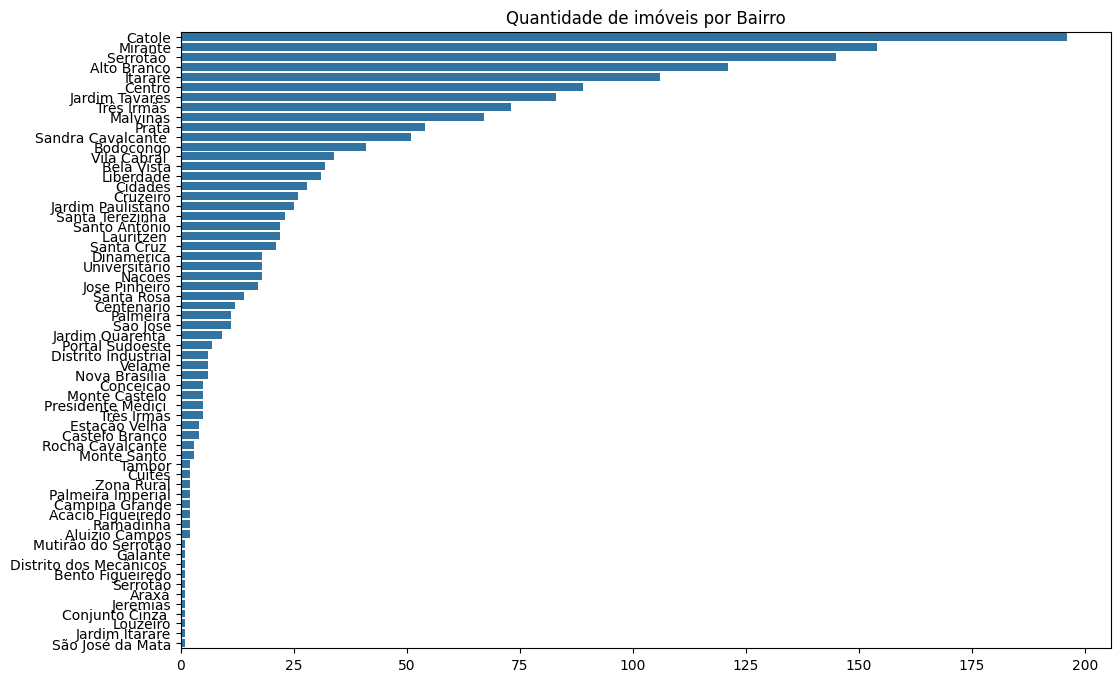

In [225]:
order = df['bairro'].value_counts().index

plt.figure(figsize=(12, 8))
ax = sns.countplot(df, y='bairro', order=order)

ax.set_title('Quantidade de imóveis por Bairro')
ax.set_xlabel('')
ax.set_ylabel('')

Como podemos ver, alguns possuem poucas amostras disponiveis, e não podem ser considerados representativos pois podem dificultar uma comparação justa com os bairros mais bem representados. Logo irei destacar esses bairros nos próximos gráficos para representar que suas amostras são limitadas.

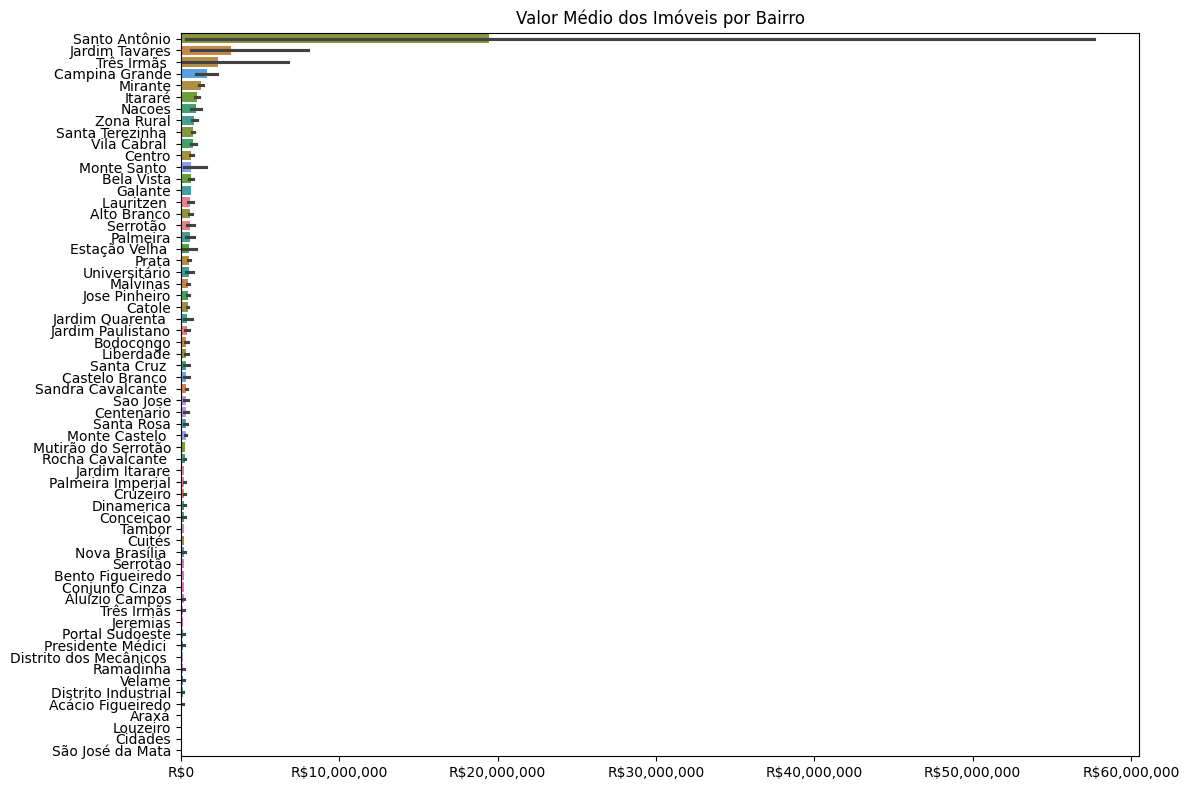

In [231]:
order = (
    df.groupby('bairro')['valor'].mean().sort_values(ascending=False).index
)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    df,
    x='valor',
    y='bairro',
    hue='bairro',
    estimator=np.mean,
    order=order,
    legend=False,
)

ax.set_title('Valor Médio dos Imóveis por Bairro')
ax.xaxis.set_major_formatter('R${x:,.0f}')
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show();